<a href="https://colab.research.google.com/github/manjimams-2000/Manjimams2000/blob/main/Logisticregression_classification_SocialNetworkAds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [5]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [9]:
df.drop(['User ID'],inplace=True,axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [10]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
duplicate = df[df.duplicated()]
duplicate

,Gender,Age,EstimatedSalary,Purchased
74,Male,32,18000,0
94,Female,29,83000,0
186,Female,20,82000,0
192,Male,29,43000,0
231,Male,39,42000,0
236,Male,40,57000,0
256,Female,41,72000,0
257,Male,40,57000,0
312,Female,38,50000,0
322,Male,41,52000,0


In [13]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [14]:
y = df['Purchased']
x = df.drop(['Purchased'],axis=1)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 3), (80, 3), (320,), (80,))

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
ln_model = LogisticRegression()
ln_model.fit(x_train,y_train)

LogisticRegression()

In [18]:
y_pred = ln_model.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

In [20]:
print(confusion_matrix(y_test,y_pred))

[[50  2]
 [ 7 21]]


In [21]:
print(accuracy_score(y_test,y_pred))

0.8875


In [22]:
print(f1_score(y_test,y_pred))

0.8235294117647057


In [23]:
print(recall_score(y_test,y_pred))

0.75


In [24]:
from sklearn.neighbors import KNeighborsClassifier


In [37]:
metric_k =[]
neighbors = np.arange(1,25)
for k in neighbors:
  knn_model = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
  knn_model.fit(x_train,y_train)
  y_pred = knn_model.predict(x_test)
  knn_acc = accuracy_score(y_test,y_pred)
  metric_k.append(knn_acc)

In [38]:
metric_k

[0.8875,
 0.8375,
 0.9125,
 0.9125,
 0.925,
 0.925,
 0.925,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.8625,
 0.875,
 0.875,
 0.875,
 0.8625]

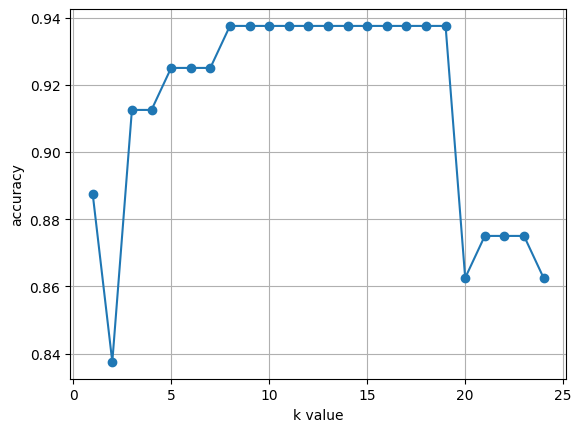

In [39]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [41]:
knn_class = KNeighborsClassifier(n_neighbors=11,metric='minkowski')
knn_class.fit(x_train,y_train)
knn_pred = knn_class.predict(x_test)
print(confusion_matrix(y_test,knn_pred))
print("Accuracy : ",accuracy_score(y_test,knn_pred))
print("F1 score : ",f1_score(y_test,knn_pred))
print("Recall : ",recall_score(y_test,knn_pred))

[[49  3]
 [ 2 26]]
Accuracy :  0.9375
F1 score :  0.912280701754386
Recall :  0.9285714285714286


In [ ]:
GAUSSIAN NAIVE BAYES


In [44]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(x_train,y_train)
naive_pred = naive_model.predict(x_test)
print(confusion_matrix(y_test,naive_pred))
print("Accuracy : ",accuracy_score(y_test,naive_pred))
print("F1 score : ",f1_score(y_test,naive_pred))
print("Recall : ",recall_score(y_test,naive_pred))


[[50  2]
 [ 3 25]]
Accuracy :  0.9375
F1 score :  0.9090909090909091
Recall :  0.8928571428571429
